# US news

In [1]:
import pandas as pd

In [2]:
us_news_path = "data_final/us_news.csv"
us_news_df = pd.read_csv(us_news_path)

# Display basic info and head
us_news_df.info(), us_news_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4000 non-null   int64 
 1   Headlines   4000 non-null   object
 2   Date        4000 non-null   object
dtypes: int64(1), object(2)
memory usage: 93.9+ KB


(None,
    Unnamed: 0                                          Headlines        Date
 0           0  Trump tax cut to dent BP profits by $1.5bn, co...  2018-01-02
 1           1           The major indexes trade lower in January  2018-01-02
 2           2  UK services grow faster than forecast despite ...  2018-01-04
 3           3  Nils Pratley on finance  \n\n\n  'Melt-up' coi...  2018-01-05
 4           4  Last year's S&P 500 losers could be prime for ...  2018-01-05)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords

us_news_df['Date'] = pd.to_datetime(us_news_df['Date'], errors='coerce')
us_news_df.dropna(subset=['Date', 'Headlines'], inplace=True)

nltk.download('stopwords')

stopwords_us = set(stopwords.words('english'))

# Simple text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [word for word in text.split() if word not in stopwords_us and len(word) > 1]
    return ' '.join(tokens)

# Apply cleaning
us_news_df['clean_headlines'] = us_news_df['Headlines'].apply(clean_text)

# Daily headline distribution
us_daily_counts = us_news_df.groupby(us_news_df['Date'].dt.date).size()

us_monthly_counts = us_news_df.groupby(us_news_df['Date'].dt.to_period("M")).size()

us_all_text = " ".join(us_news_df['clean_headlines'].tolist())
us_wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(us_all_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janedoe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


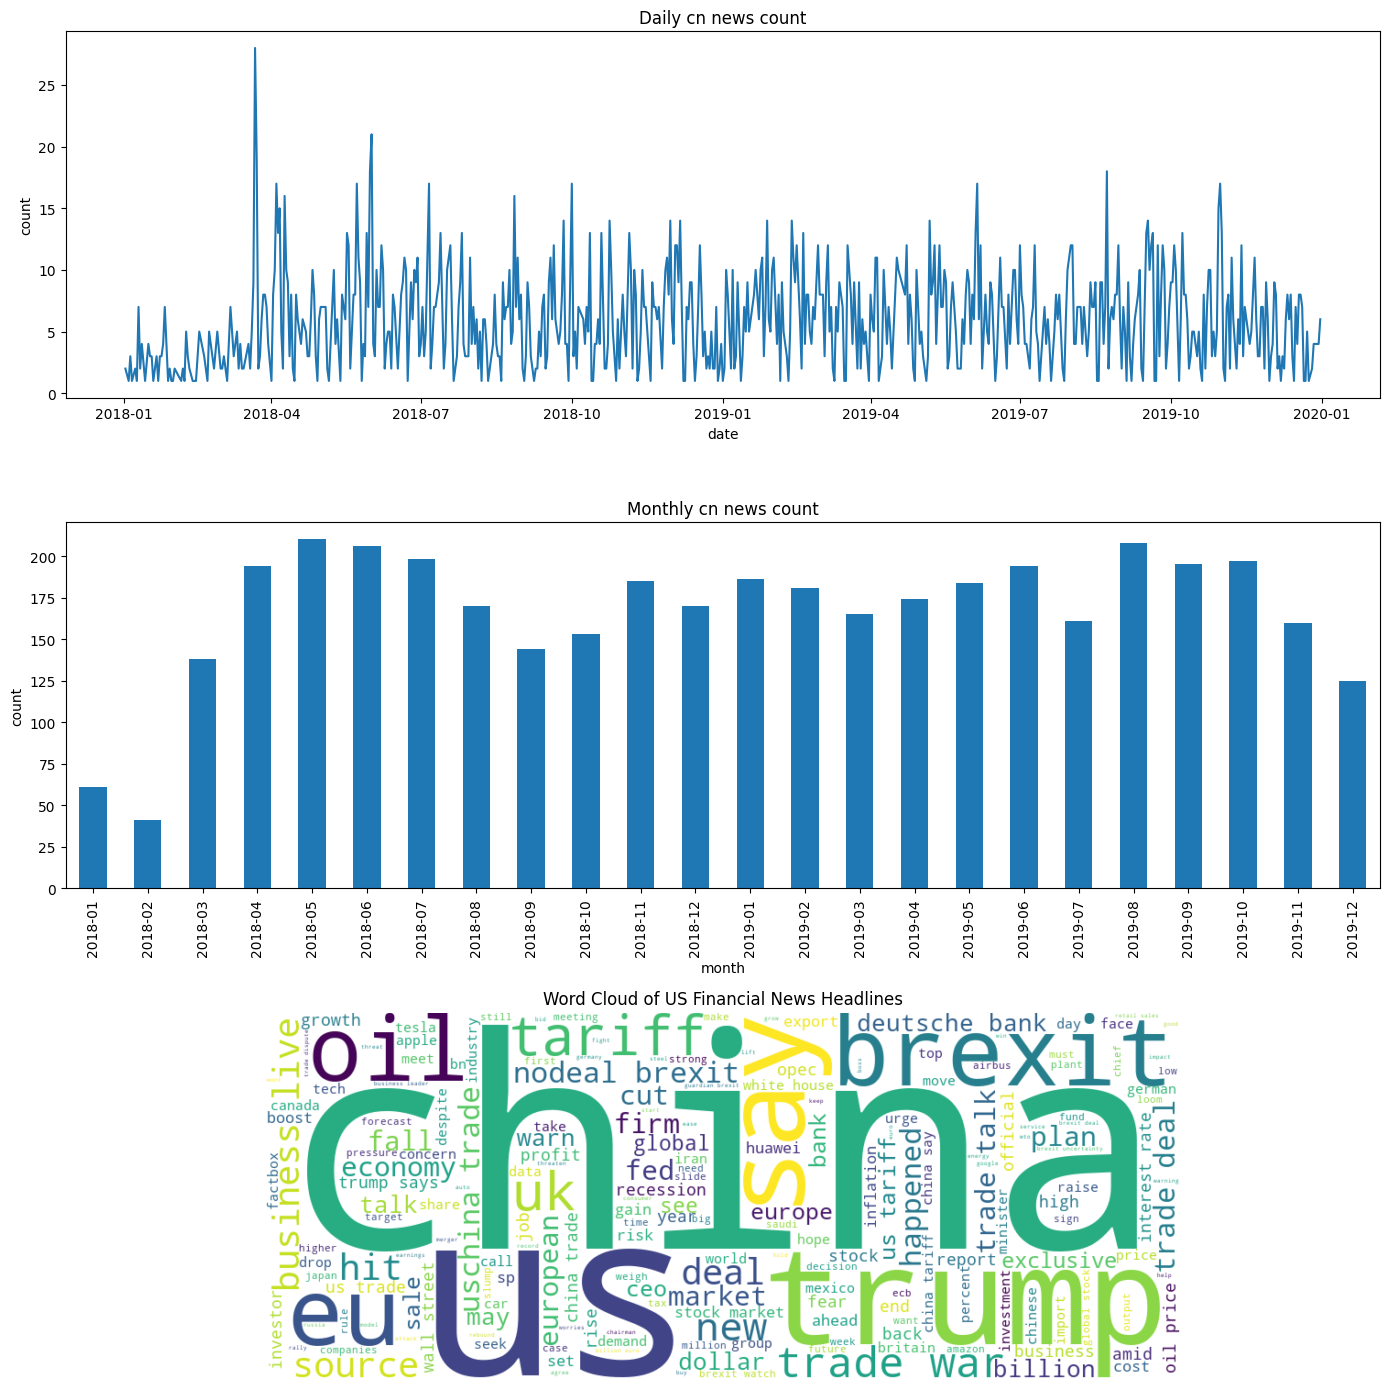

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(14, 14))

# Daily headline distribution
axes[0].plot(us_daily_counts.index, us_daily_counts.values)
axes[0].set_title("Daily cn news count")
axes[0].set_xlabel("date")
axes[0].set_ylabel("count")

# Monthly headline distribution
us_monthly_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title("Monthly cn news count")
axes[1].set_xlabel("month")
axes[1].set_ylabel("count")

axes[2].imshow(us_wordcloud, interpolation='bilinear')
axes[2].axis("off")
axes[2].set_title("Word Cloud of US Financial News Headlines")

plt.tight_layout()
plt.show()

In [5]:
us_tfidf = TfidfVectorizer(max_features=10)
us_tfidf.fit_transform(us_news_df['clean_headlines'])
print("Top 10 TF-IDF words:", us_tfidf.get_feature_names_out())

Top 10 TF-IDF words: ['brexit' 'china' 'eu' 'oil' 'says' 'tariffs' 'trade' 'trump' 'uk' 'us']


# CN news

In [6]:
# Load the uploaded China news dataset
cn_news_path = "data_final/cn_news.csv"
cn_news_df = pd.read_csv(cn_news_path)

# Show basic info and head for verification
cn_news_df.info(), cn_news_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3578 non-null   int64 
 1   Headlines   3578 non-null   object
 2   time        3578 non-null   object
dtypes: int64(1), object(2)
memory usage: 84.0+ KB


(None,
    Unnamed: 0                                          Headlines        time
 0           0  【2018年基金展望：公募弱冠重构江湖 私募借势探路国际】2018年是贯彻党的十九大精神的开...  2018-01-01
 1           1  【2017年基金排名新鲜出炉 价值投资者尽享“王者盛宴”】随着2017年最后一个交易日结束，...  2018-01-01
 2           2  【全年PMI增长平稳 中国经济换挡进入新阶段】近日，国家统计局服务业调查中心和中国物流与采购...  2018-01-01
 3           3  【四部委：新能源车免征购置税延至2020年】12月27日，财政部等四部委发布公告称，财政部、...  2018-01-01
 4           4  【新华社：2018年A股“高歌”开门红 资本市场发展新年将“更上层楼”】2018年第一个交易...  2018-01-02)

Building prefix dict from the default dictionary ...


Dumping model to file cache /var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/jieba.cache
Loading model cost 0.319 seconds.
Prefix dict has been built successfully.


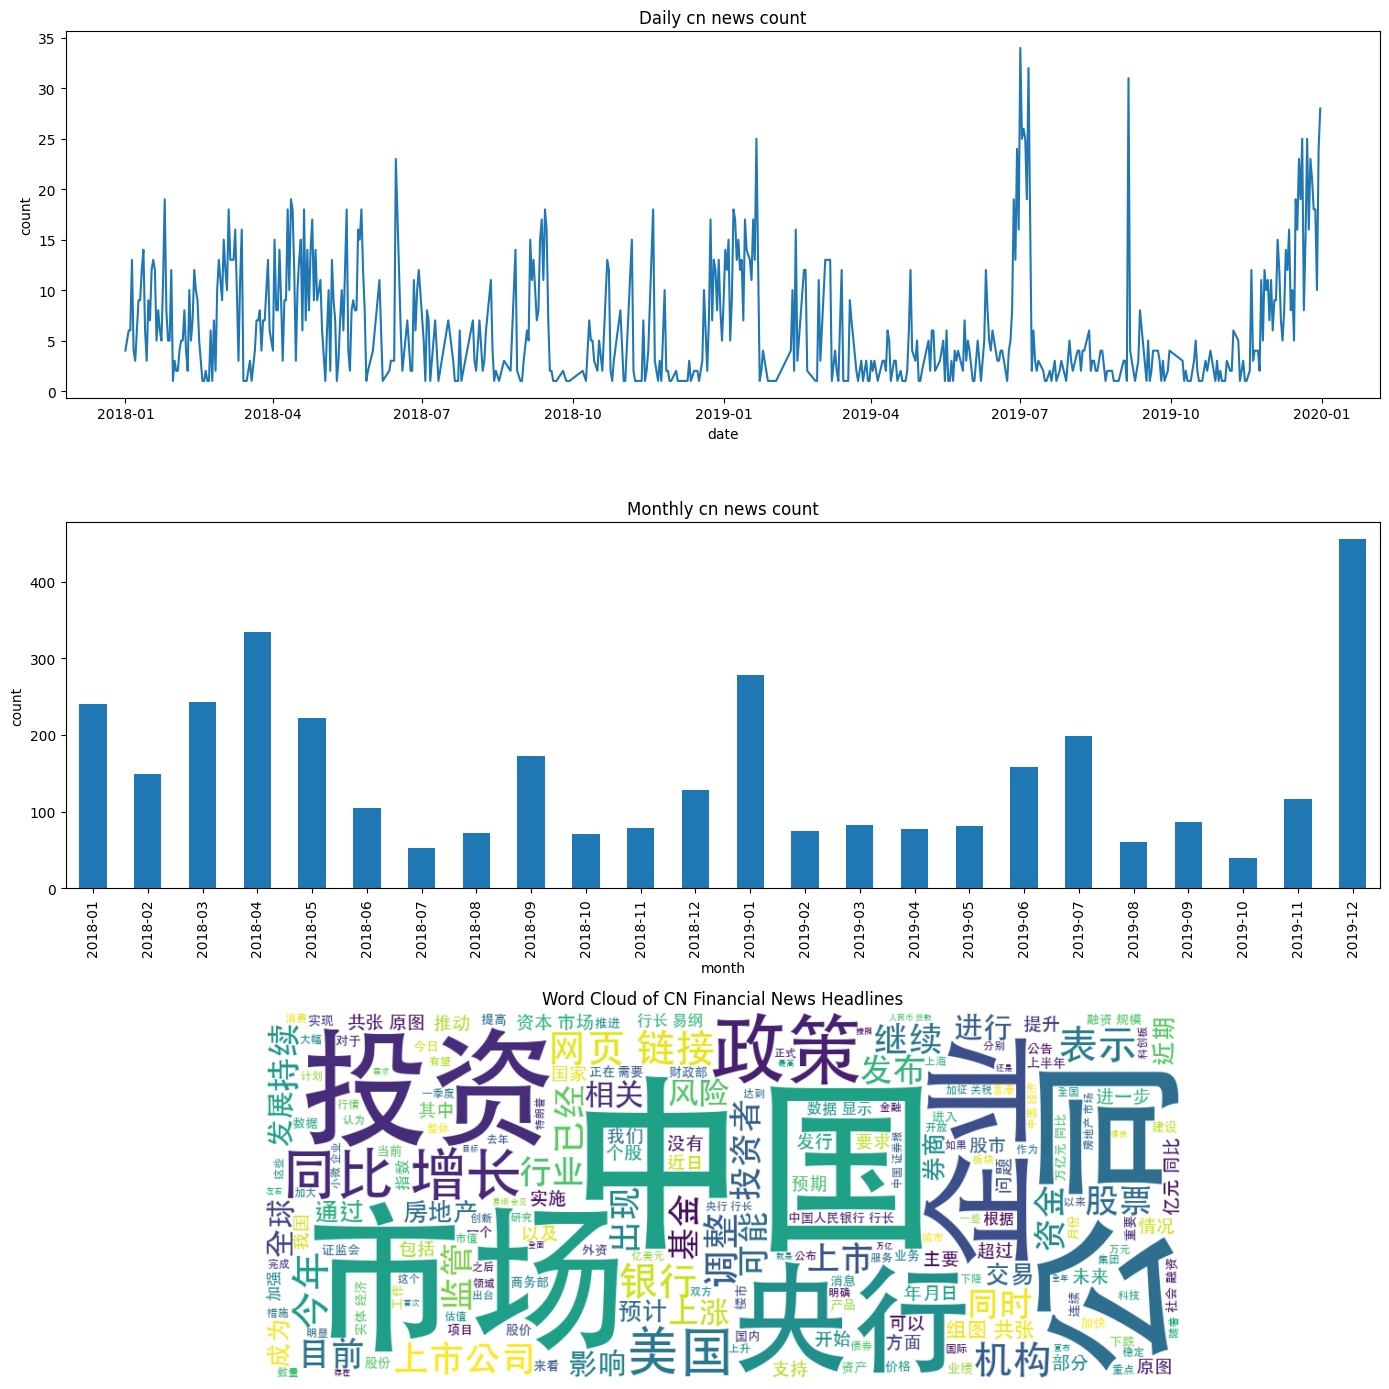

In [11]:
import jieba

cn_news_df['time'] = pd.to_datetime(cn_news_df['time'], errors='coerce')

cn_news_df.dropna(subset=['time', 'Headlines'], inplace=True)

def clean_chinese(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", str(text))
    words = jieba.lcut(text)
    words = [w for w in words if len(w) > 1]
    return " ".join(words)

cn_news_df['clean_headlines'] = cn_news_df['Headlines'].apply(clean_chinese)

cn_daily_counts = cn_news_df.groupby(cn_news_df['time'].dt.date).size()

cn_monthly_counts = cn_news_df.groupby(cn_news_df['time'].dt.to_period("M")).size()

cn_all_text = " ".join(cn_news_df['clean_headlines'].tolist())
cn_wordcloud = WordCloud(
    font_path = "/System/Library/Fonts/STHeiti Medium.ttc",
    width=1000,
    height=400,
    background_color='white'
).generate(cn_all_text)

fig, axes = plt.subplots(3, 1, figsize=(14, 14))

axes[0].plot(cn_daily_counts.index, cn_daily_counts.values)
axes[0].set_title("Daily cn news count")
axes[0].set_xlabel("date")
axes[0].set_ylabel("count")

cn_monthly_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title("Monthly cn news count")
axes[1].set_xlabel("month")
axes[1].set_ylabel("count")

axes[2].imshow(cn_wordcloud, interpolation='bilinear')
axes[2].axis("off")
axes[2].set_title("Word Cloud of CN Financial News Headlines")

plt.tight_layout()
plt.show()

# NLP

## US news NLP

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [t for t in text.split() if t not in stopwords and len(t) > 1]
    return tokens

# Apply to data
us_news_df["tokens"] = us_news_df["Headlines"].apply(preprocess)
us_news_df["clean_text"] = us_news_df["tokens"].apply(lambda x: " ".join(x))

# Preview
print(us_news_df[["Headlines", "tokens"]].head())

                                           Headlines  \
0  Trump tax cut to dent BP profits by $1.5bn, co...   
1           The major indexes trade lower in January   
2  UK services grow faster than forecast despite ...   
3  Nils Pratley on finance  \n\n\n  'Melt-up' coi...   
4  Last year's S&P 500 losers could be prime for ...   

                                              tokens  
0  [trump, tax, cut, dent, bp, profits, bn, compa...  
1            [major, indexes, trade, lower, january]  
2  [uk, services, grow, faster, forecast, despite...  
3  [nils, pratley, finance, meltup, coinage, sign...  
4      [last, years, sp, losers, prime, speculation]  


In [11]:
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(us_news_df["clean_text"])
print("TF-IDF shape:", tfidf_matrix.shape)


TF-IDF shape: (4000, 500)


In [12]:
w2v_model = Word2Vec(sentences=us_news_df["tokens"], vector_size=100, window=5, min_count=2, workers=4)
print("Embedding for 'market':", w2v_model.wv["market"])


Embedding for 'market': [-0.25614494  0.3769329   0.16702849  0.04004952  0.00754512 -0.5951194
  0.21949118  0.76309    -0.32230493 -0.27235374 -0.31810257 -0.64149547
 -0.04778342  0.16236608  0.18505046 -0.31963953  0.21715401 -0.40705872
 -0.06936442 -0.6847795   0.252302    0.16085634  0.22394606 -0.19778289
 -0.08644167  0.00237886 -0.2372686  -0.10980779 -0.38779202  0.11465287
  0.450716    0.05985215  0.04278405 -0.23445064 -0.20711419  0.3951098
  0.17052762 -0.44270056 -0.31725273 -0.5190989   0.02289566 -0.28501156
 -0.08865272  0.01915601  0.4237066  -0.1917767  -0.41495395 -0.05266956
  0.20254111  0.32627022  0.07639977 -0.28373128 -0.11145258 -0.17082703
 -0.25506368  0.19535704  0.2142756   0.00192435 -0.41659868 -0.07243004
  0.13898413  0.00263298 -0.08272158  0.06672672 -0.3859627   0.37910762
 -0.00321486  0.39515293 -0.50251955  0.543552   -0.26629412  0.18579268
  0.50193727  0.02256187  0.41413328  0.20906393  0.18212108 -0.05952886
 -0.34607863  0.12513529 -0.2

In [13]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModel.from_pretrained("ProsusAI/finbert")

# Embed one example (you can batch)
text = us_news_df["Headlines"].iloc[0]
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
with torch.no_grad():
    outputs = model(**inputs)
embedding = outputs.last_hidden_state.mean(dim=1)
print("FinBERT embedding shape:", embedding.shape)

/Users/janedoe/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


FinBERT embedding shape: torch.Size([1, 768])


## CN NLP

In [14]:
# Clean + tokenize Chinese
def preprocess_chinese(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", str(text))  # Keep only Chinese chars
    tokens = jieba.lcut(text)
    tokens = [t for t in tokens if len(t) > 1]  # Remove single characters
    return tokens

cn_news_df['tokens'] = cn_news_df['Headlines'].apply(preprocess_chinese)
cn_news_df['clean_text'] = cn_news_df['tokens'].apply(lambda x: " ".join(x))

# TF-IDF vectorization
tfidf_cn = TfidfVectorizer(max_features=500)
tfidf_matrix_cn = tfidf_cn.fit_transform(cn_news_df["clean_text"])

print("TF-IDF matrix shape:", tfidf_matrix.shape)
print("Top 10 TF-IDF features:", tfidf.get_feature_names_out()[:10])


TF-IDF matrix shape: (4000, 500)
Top 10 TF-IDF features: ['activity' 'administration' 'adviser' 'agree' 'ahead' 'airbus' 'aluminum'
 'amazon' 'america' 'amid']


In [15]:
w2v_model_cn = Word2Vec(sentences=cn_news_df["tokens"], vector_size=100, window=5, min_count=2, workers=4)
print("Embedding for 'market':", w2v_model_cn.wv["市场"])


Embedding for 'market': [-0.4178404   0.82361364  0.39546755  0.17248103 -0.32447162 -1.2437521
 -0.02219999  1.0710577  -0.5329941  -0.38808748 -0.4654017  -0.7758282
  0.07177866 -0.22498146  0.36273527 -0.5937052   0.51143616 -0.44590175
  0.35764486 -1.1324717   0.46561208  0.05223909  0.9633602  -1.2558366
 -0.17190003  0.2839267  -1.2786672  -0.10200962  0.00134821  0.08420379
  0.84003216  0.44621196 -0.25916606 -0.03640784 -0.2237763   0.6162996
  0.29169434 -0.6987474  -0.48877665 -0.7029121   0.7081217  -0.48963195
 -0.21251108 -0.52365243 -0.07155839 -0.33393884 -0.25180718 -0.18690382
  0.26174727  0.528591    0.04587126 -0.7838041  -0.35084805  0.20731357
 -0.54674256  0.60947704  0.7661728   0.65625393 -0.63759077  0.30727276
  0.13634129  0.26570496 -0.3094818  -0.52956593 -0.5320665   0.21403754
  0.37308484 -0.19980687 -0.5152302   0.90259665 -1.0822517  -0.25826487
  0.6629296   0.46488097 -0.01202497  0.44075647 -0.7439484   0.62326866
 -1.1729265   0.48994714 -0.855